In [ ]:
from udl_project.training import config

EPOCHS = 25

In [ ]:
from udl_project.training.resnet_model_trainer import ResNetModelTrainer

res_net_mode_trainer = ResNetModelTrainer(epochs=EPOCHS, learning_rate=config.LEARNING_RATE)
res_net_mode_trainer.train()

Data directory: /home/jannes/.cache/kagglehub/datasets/lara311/flowers-five-classes/versions/1
Classes: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Image batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


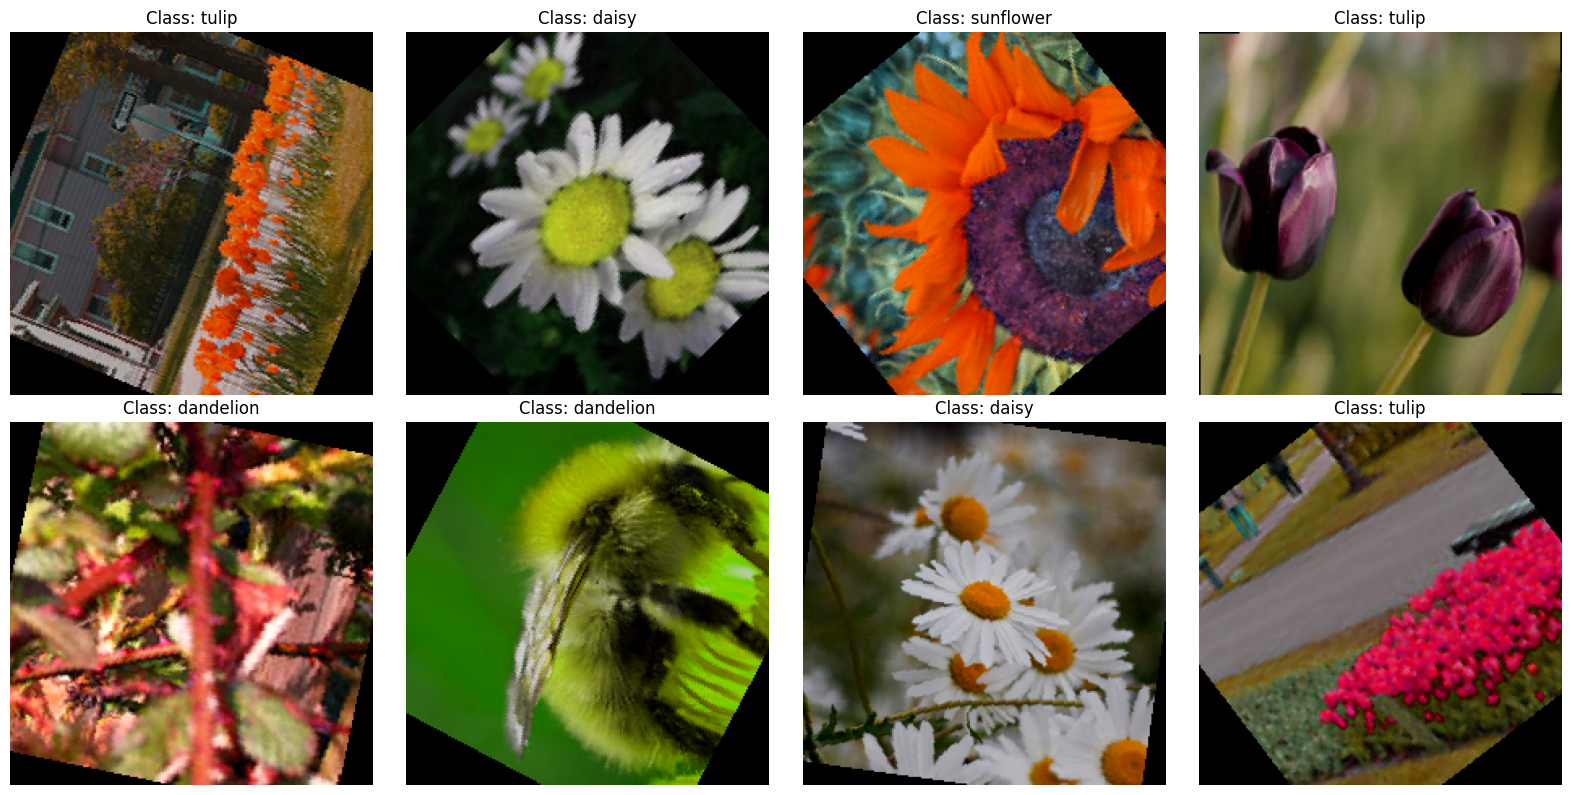

In [2]:
import matplotlib.pyplot as plt
import torch

from udl_project.data_handling.data_loader_flowers import DataLoaderFlowers
from udl_project.data_handling.flower_dataset import FlowerDataset

# Create the dataset and dataloader
flower_dataset = FlowerDataset(train_test_spilt=0.8)
dataloader = DataLoaderFlowers.create_dataloader(flower_dataset)

# Get a batch of training data
train_loader = dataloader.get_train_dataloader()
data_iter = iter(train_loader)
images, labels = next(data_iter)


# Function to show images
def show_augmented_images(images, labels, class_names, num_images=8):
    """Display a grid of augmented images."""
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()

    for i in range(min(num_images, len(images))):
        # Convert tensor to numpy and transpose for matplotlib
        img = images[i].clone()

        # Clamp values to [0, 1] range
        img = torch.clamp(img, 0, 1)

        # Convert to numpy and transpose
        img_np = img.permute(1, 2, 0).numpy()

        axes[i].imshow(img_np)
        axes[i].set_title(f"Class: {class_names[labels[i]]}")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()


# Get class names from the dataset
class_names = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
print(f"Classes: {class_names}")
print(f"Image batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")

# Show the augmented images
show_augmented_images(images, labels, class_names)